# <span style ='color:purple'>Import & settings

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%reload_ext autoreload
%autoreload 2

from data_provider.data_factory import data_provider
from tabular.dl_logs import logs_summary, exp_summary
from tabular.data import load_data
from tabular.feature_engineering import compute_dispersion, compute_polarization, compute_centroid

In [2]:
from types import SimpleNamespace
lt_logs_df = pd.read_csv(os.path.join('./logs/long_term_forecast.csv'), index_col = 0)
usc_args = SimpleNamespace(**lt_logs_df.loc[207].to_dict())

In [3]:
seq_len = 32
pred_len = seq_len
usc_args.seq_len = seq_len
usc_args.pred_len = pred_len
usc_args.scale = False

# <span style ='color:cyan'> Data loading

In [4]:
X,y = load_data(seq_len=seq_len, pred_len=pred_len, off_mask=False)
X.shape, y.shape

((56270, 32, 63), (56270,))

In [ ]:
disp = compute_dispersion(X)
disp.shape

(56270, 32)

In [ ]:
pol = compute_polarization(X)
pol.shape

(56270, 32)

In [8]:
pol[0]

array([0.14417772, 0.14262362, 0.1677254 , 0.13825038, 0.1696454 ,
       0.13837162, 0.12076344, 0.06806764, 0.06325693, 0.16080676,
       0.23963253, 0.21157847, 0.22239843, 0.19134896, 0.20143096,
       0.31848118, 0.3796935 , 0.31934643, 0.43901938, 0.4956889 ,
       0.49060547, 0.57249045, 0.6259553 , 0.6332169 , 0.684906  ,
       0.65883034, 0.6542749 , 0.66459477, 0.6491783 , 0.6821041 ,
       0.62993234, 0.58583677], dtype=float32)

In [9]:
resh_pol = pol.reshape(pol.shape[0], 4,8)
resh_pol[0]

array([[0.14417772, 0.14262362, 0.1677254 , 0.13825038, 0.1696454 ,
        0.13837162, 0.12076344, 0.06806764],
       [0.06325693, 0.16080676, 0.23963253, 0.21157847, 0.22239843,
        0.19134896, 0.20143096, 0.31848118],
       [0.3796935 , 0.31934643, 0.43901938, 0.4956889 , 0.49060547,
        0.57249045, 0.6259553 , 0.6332169 ],
       [0.684906  , 0.65883034, 0.6542749 , 0.66459477, 0.6491783 ,
        0.6821041 , 0.62993234, 0.58583677]], dtype=float32)

In [ ]:

def downsample_data(X, downsample_factor:int):
    X.shape[1]
    if  X.shape[1] % downsample_factor != 0 :

<Axes: ylabel='Count'>

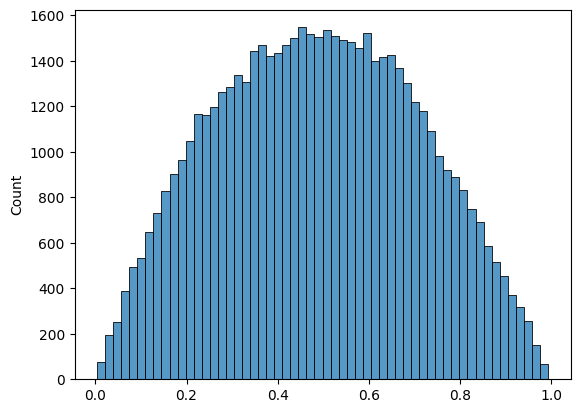

In [ ]:
sns.histplot(x = pol[:,5])